In [2]:

import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import random
import pickle
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model


from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")
print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:00<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [4]:
test_path = os.path.join(path, "test")
train_path = os.path.join(path, "train")
print(os.listdir(test_path), os.listdir(train_path))

['surprise', 'angry', 'neutral', 'happy', 'disgust', 'fear', 'sad'] ['surprise', 'angry', 'neutral', 'happy', 'disgust', 'fear', 'sad']


In [5]:
datadir = train_path

In [6]:
classes = ['angry', 'disgust', 'fear', 'happy','neutral','sad', 'surprise']
dic = {
    'angry':0,
    'disgust':1,
    'fear':2,
    'happy':3,
    'neutral':4,
    'sad':5,
    'surprise':6
}

In [ ]:
import kagglehub

# Download latest version
path2 = kagglehub.dataset_download("thienkhonghoc/affectnet")

print("Path to dataset files:", path2)

100%|██████████| 1.75G/1.75G [00:23<00:00, 78.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thienkhonghoc/affectnet/versions/3


In [ ]:
os.listdir(path2)

['AffectNet']

In [ ]:
os.listdir(os.path.join(path2, 'AffectNet'))

['val', 'train', 'test']

In [ ]:
train2 = os.path.join(path2, 'AffectNet/train')
test2 = os.path.join(path2, 'AffectNet/test')
val2 = os.path.join(path2, 'AffectNet/val')

In [ ]:
shutil.rmtree(train2 + '/7')
shutil.rmtree(test2 + '/7')
shutil.rmtree(val2 + '/7')

In [ ]:
os.rename(train2 + '/5', train2 + '/55')
os.rename(test2 + '/5', test2 + '/55')
os.rename(val2 + '/5', val2 + '/55')

In [ ]:
os.rename(train2 + '/4', train2 + '/5')
os.rename(test2 + '/4', test2 + '/5')
os.rename(val2 + '/4', val2 + '/5')
os.rename(train2 + '/6', train2 + '/4')
os.rename(test2 + '/6', test2 + '/4')
os.rename(val2 + '/6', val2 + '/4')
os.rename(train2 + '/55', train2 + '/6')
os.rename(test2 + '/55', test2 + '/6')
os.rename(val2 + '/55', val2 + '/6')


In [ ]:
os.makedirs(path2+'/AffectNet/only_disgust', exist_ok=True)
os.makedirs(path2+'/AffectNet/only_disgust/1', exist_ok=True)

In [ ]:
os.listdir(os.path.join(path2, 'AffectNet'))

['val', 'only_disgust', 'train', 'test']

In [ ]:
shutil.copytree(os.path.join(path2, 'AffectNet/train/1'), os.path.join(path2, 'AffectNet/only_disgust/1'), dirs_exist_ok=True)

'/root/.cache/kagglehub/datasets/thienkhonghoc/affectnet/versions/3/AffectNet/only_disgust/1'

In [ ]:
disgust = os.path.join(path2, 'AffectNet/only_disgust')

In [ ]:
shutil.copytree(os.path.join(path2, 'AffectNet/train/0'), os.path.join(path2, 'AffectNet/only_disgust/0'), dirs_exist_ok=True)
shutil.copytree(os.path.join(path2, 'AffectNet/train/2'), os.path.join(path2, 'AffectNet/only_disgust/2'), dirs_exist_ok=True)
shutil.copytree(os.path.join(path2, 'AffectNet/train/3'), os.path.join(path2, 'AffectNet/only_disgust/3'), dirs_exist_ok=True)
shutil.copytree(os.path.join(path2, 'AffectNet/train/4'), os.path.join(path2, 'AffectNet/only_disgust/4'), dirs_exist_ok=True)
shutil.copytree(os.path.join(path2, 'AffectNet/train/5'), os.path.join(path2, 'AffectNet/only_disgust/5'), dirs_exist_ok=True)
shutil.copytree(os.path.join(path2, 'AffectNet/train/6'), os.path.join(path2, 'AffectNet/only_disgust/6'), dirs_exist_ok=True)

'/root/.cache/kagglehub/datasets/thienkhonghoc/affectnet/versions/3/AffectNet/only_disgust/6'

In [ ]:
remove = {
    "0" : 4500,
    "1" : 0,
    "2" : 3500,
    "3" : 4500,
    "4" : 4500,
    "5" : 3500,
    "6" : 3500
}

In [ ]:
for i in range(7):
    path_to_remove = os.path.join(disgust,str(i))
    n = remove[str(i)]
    img_names = os.listdir(path_to_remove)
    img_names = random.sample(img_names, n)
    for image in img_names:
        f = os.path.join(path_to_remove, image)
        os.remove(f)

In [ ]:
os.makedirs(path+'/disgust', exist_ok=True)
shutil.copytree(os.path.join(train_path, 'disgust'), os.path.join(path, 'disgust/1'), dirs_exist_ok=True)
os.makedirs(path+'/disgust/0', exist_ok=True)
os.makedirs(path+'/disgust/2', exist_ok=True)
os.makedirs(path+'/disgust/3', exist_ok=True)
os.makedirs(path+'/disgust/4', exist_ok=True)
os.makedirs(path+'/disgust/5', exist_ok=True)
os.makedirs(path+'/disgust/6', exist_ok=True)

In [ ]:
disgust_fer = os.path.join(path, 'disgust')

In [7]:
c = 0
for category in classes:
    path_ = os.path.join(datadir, category)
    new_folder_name = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/" + str(c)
    print(new_folder_name)
    os.rename(path_, new_folder_name)
    c += 1

/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/0
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/1
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/2
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/3
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/4
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/5
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/6


In [8]:
c = 0
for category in classes:
    pa = os.path.join(test_path, category)
    new_folder_name = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/" + str(c)
    print(new_folder_name)
    os.rename(pa, new_folder_name)
    c += 1

/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/0
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/1
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/2
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/3
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/4
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/5
/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/test/6


In [9]:
EPOCHS = 50
BS = 128
DROPOUT_RATE = 0.5
FROZEN_LAYER_NUM = 10

ADAM_LEARNING_RATE = 0.001
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001

Resize_pixelsize = 197

In [ ]:


vgg_notop = VGG16(weights = 'imagenet', include_top=False, input_shape=(Resize_pixelsize, Resize_pixelsize, 3),pooling = 'avg')

last_layer = vgg_notop.output
x = Flatten(name='flatten')(last_layer)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(4096, activation='relu', name='fc6')(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation='relu', name='fc7')(x)
x = Dropout(DROPOUT_RATE)(x)


out = Dense(7, activation='softmax', name='classifier')(x)

model = Model(vgg_notop.input, out)


optim = keras.optimizers.Adam(learning_rate=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = keras.optimizers.SGD(learning_rate=SGD_LEARNING_RATE, momentum=0.9, decay=SGD_DECAY, nesterov=True)
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)


callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = './model.keras',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = False,
    mode = 'min'
)
callback_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath='./latest_epoch.keras',
    monitor='epoch', 
    save_best_only=False, 
    save_weights_only=False,
    mode='auto'
)


model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


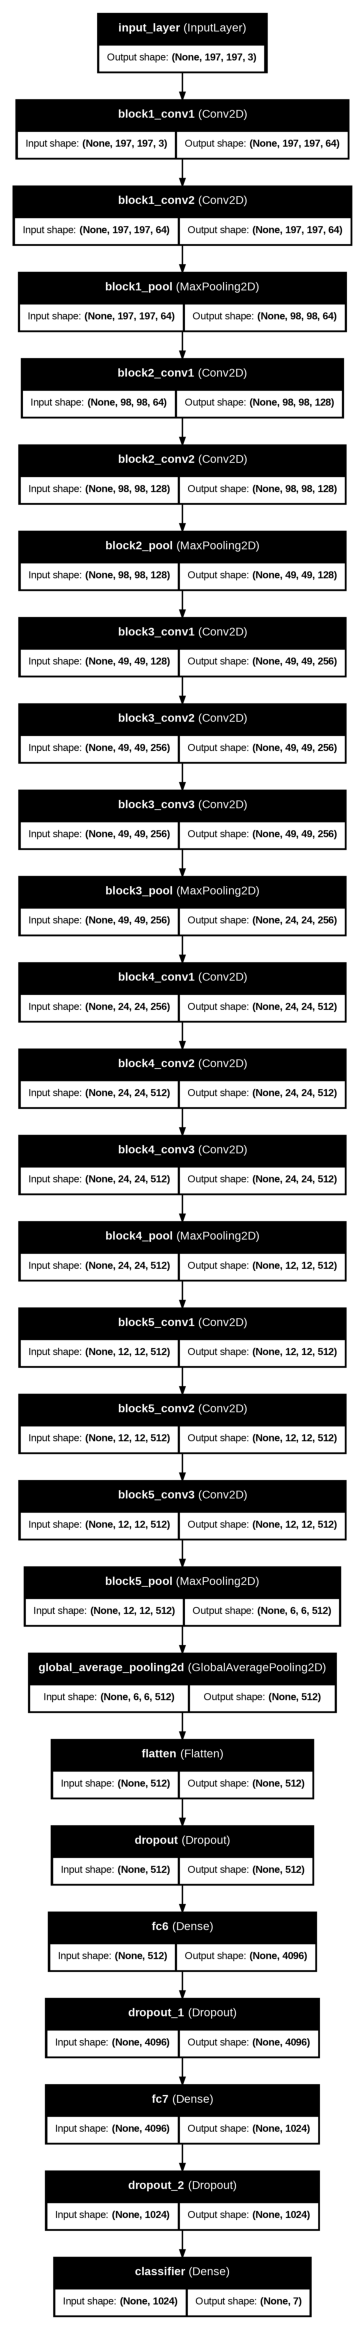

In [ ]:

from tensorflow.keras.utils import plot_model


plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('model_structure.png')
plt.figure(figsize=(40, 30))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:

def get_datagen(dataset, aug=False, shuffle = False):
    if shuffle:
        if aug:
            datagen = ImageDataGenerator(
                                rescale=1./255,
                                featurewise_center=False,
                                featurewise_std_normalization=False,
                                rotation_range=10,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True)
        else:
            datagen = ImageDataGenerator(rescale=1./255)

        return datagen.flow_from_directory(
                dataset,
                target_size=(197, 197),
                color_mode='rgb',
                shuffle = True,
                class_mode='categorical',
                batch_size=BS)
    else:
        if aug:
            datagen = ImageDataGenerator(
                                rescale=1./255,
                                featurewise_center=False,
                                featurewise_std_normalization=False,
                                rotation_range=10,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True)
        else:
            datagen = ImageDataGenerator(rescale=1./255)

        return datagen.flow_from_directory(
                dataset,
                target_size=(197, 197),
                color_mode='rgb',
                shuffle = False,
                class_mode='categorical',
                batch_size=BS)


In [ ]:
train_generator  = get_datagen(train_path, True,True)
test_generator  = get_datagen(test_path)
train2_generator = get_datagen(disgust, True, True)

disgust_generator = get_datagen(disgust_fer,False,True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 9803 images belonging to 7 classes.
Found 2800 images belonging to 7 classes.
Found 436 images belonging to 7 classes.


In [11]:
test_generator  = get_datagen(test_path)

Found 7178 images belonging to 7 classes.


In [ ]:
test2_generator = get_datagen(test2)
validation_generator = get_datagen(val2)

In [ ]:
history = model.fit(
    x = train_generator,
    validation_data=test_generator,
    steps_per_epoch=28709// BS,
    validation_steps=3509 // BS,
    shuffle=True,
    epochs=100,
    callbacks=[rlrop,callback,callback_epoch]
)

with open('./history.pkl', 'wb') as f:
    pickle.dump(model.history, f)

Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.2413 - loss: 1.8392 - val_accuracy: 0.2737 - val_loss: 1.7248 - learning_rate: 0.0100
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.2656 - loss: 1.6897 - val_accuracy: 0.3024 - val_loss: 1.6924 - learning_rate: 0.0100
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.3478 - loss: 1.6170 - val_accuracy: 0.3647 - val_loss: 1.5770 - learning_rate: 0.0100
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.2422 - loss: 1.6907 - val_accuracy: 0.3458 - val_loss: 1.6181 - learning_rate: 0.0100
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.3769 - loss: 1.5470 - val_accuracy: 0.5191 - val_loss: 1.2858 - learning_rate: 0.0100
Epoch 6/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4688 - loss: 1.3018 - val_accuracy: 0.5338 - val_loss: 1.2551 - learning_rate: 0.0100
Epoch 7/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.5092 -

In [ ]:
model2 = models.load_model('./model.keras')

In [ ]:
model2.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 494ms/step - accuracy: 0.6083 - loss: 1.0269


[1.0061556100845337, 0.614934504032135]

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = './model2.keras',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = False,
    mode = 'min'
)

history = model2.fit(
    x = train_generator,
    validation_data=test_generator,
    steps_per_epoch=28709// BS,
    validation_steps=3509 // BS,
    shuffle=True,
    epochs=100,
    initial_epoch=18,
    callbacks=[rlrop,callback,callback_epoch]
)

with open('./history.pkl', 'wb') as f:
    pickle.dump(model2.history, f)

Epoch 19/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.6481 - loss: 0.9512 - val_accuracy: 0.6357 - val_loss: 0.9666 - learning_rate: 0.0100
Epoch 20/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.6953 - loss: 0.9242 - val_accuracy: 0.6311 - val_loss: 0.9735 - learning_rate: 0.0100
Epoch 21/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.6632 - loss: 0.9192 - val_accuracy: 0.6241 - val_loss: 1.0288 - learning_rate: 0.0100
Epoch 22/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7188 - loss: 0.8472 - val_accuracy: 0.6288 - val_loss: 1.0000 - learning_rate: 0.0100
Epoch 23/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.6737 - loss: 0.8813 - val_accuracy: 0.6317 - val_loss: 0.9685 - learning_rate: 0.0100
Epoch 24/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7734 - loss: 0.8651 - val_accuracy: 0.6617 - val_loss: 0.8699 - learning_rate: 0.0100
Epoch 25/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0

In [ ]:
model3 = models.load_model('./model2.keras')

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = './model3.keras',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = False,
    mode = 'min'
)

history = model3.fit(
    x = train_generator,
    validation_data=test_generator,
    steps_per_epoch=28709// BS,
    validation_steps=3509 // BS,
    shuffle=True,
    epochs=100,
    initial_epoch = 52,
    callbacks=[rlrop,callback,callback_epoch]
)

with open('./history.pkl', 'wb') as f:
    pickle.dump(model.history, f)

Epoch 53/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 637s 2s/step - accuracy: 0.6832 - loss: 0.8577 - val_accuracy: 0.6418 - val_loss: 0.9397 - learning_rate: 0.0100
Epoch 54/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.6406 - loss: 0.9420 - val_accuracy: 0.6508 - val_loss: 0.9246 - learning_rate: 0.0100
Epoch 55/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.6965 - loss: 0.8283 - val_accuracy: 0.6805 - val_loss: 0.8319 - learning_rate: 0.0100
Epoch 56/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6484 - loss: 0.9456 - val_accuracy: 0.6458 - val_loss: 0.9491 - learning_rate: 0.0100
Epoch 57/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.7011 - loss: 0.8087 - val_accuracy: 0.6536 - val_loss: 0.9424 - learning_rate: 0.0100
Epoch 58/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7656 - loss: 0.6650 - val_accuracy: 0.6466 - val_loss: 0.9126 - learning_rate: 0.0100
Epoch 59/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0

AttributeError: 'Functional' object has no attribute 'history'

In [ ]:
model3

<Functional name=functional, built=True>

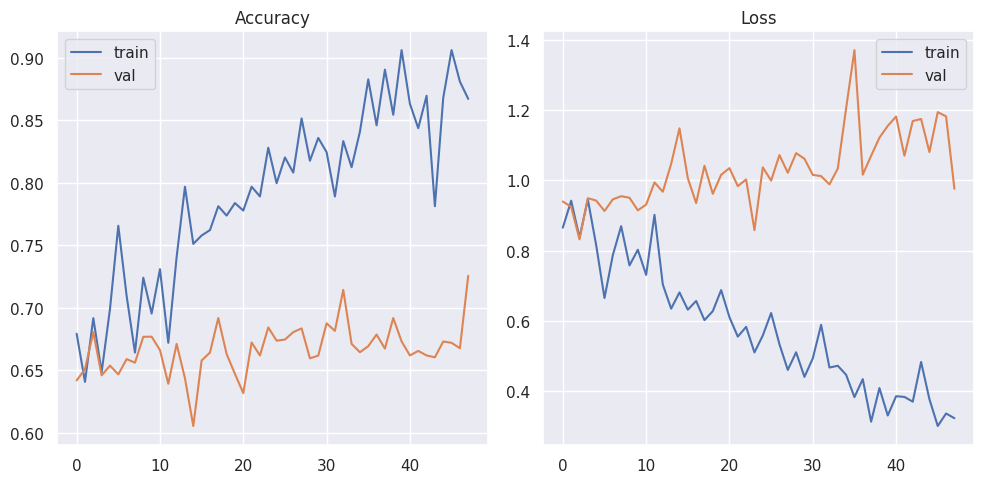

In [ ]:
sns.set()
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,2,1)
sns.lineplot(history.history['accuracy'] ,label = 'train')
sns.lineplot(history.history['val_accuracy'] ,label = 'val')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.lineplot( history.history['loss'] ,label = 'train')
sns.lineplot( history.history['val_loss'] ,label = 'val')
plt.title('Loss')
plt.tight_layout()


In [ ]:

model3.save('./my_model.keras')

In [ ]:
main_model = models.load_model('./my_model.keras')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9, decay=SGD_DECAY, nesterov=True)
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',mode='max',factor=0.5, patience=10, min_lr=1e-8, verbose=1)

for layer in main_model.layers[:-10]:  
    layer.trainable = False

callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = './model.keras',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = False,
    mode = 'min'
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


main_model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune2_4 = main_model.fit(
    x = train2_generator,
    validation_data=test_generator,
    steps_per_epoch=28709// BS,
    validation_steps=3509 // BS,
    shuffle=True,
    epochs=10,
    callbacks=[early_stopping,rlrop,callback,callback_epoch]
)

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 121s 329ms/step - accuracy: 0.0684 - loss: 3.8457 - val_accuracy: 0.6447 - val_loss: 0.9467 - learning_rate: 1.0000e-05
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 88s 246ms/step - accuracy: 0.0722 - loss: 3.7197 - val_accuracy: 0.6481 - val_loss: 0.9333 - learning_rate: 1.0000e-05
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 61s 221ms/step - accuracy: 0.0756 - loss: 3.6095 - val_accuracy: 0.6391 - val_loss: 0.9446 - learning_rate: 1.0000e-05
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 68s 256ms/step - accuracy: 0.0805 - loss: 3.4568 - val_accuracy: 0.6557 - val_loss: 0.9232 - learning_rate: 1.0000e-05
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 68s 251ms/step - accuracy: 0.0868 - loss: 3.3574 - val_accuracy: 0.6467 - val_loss: 0.9571 - learning_rate: 1.0000e-05
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 55s 198ms/step - accuracy: 0.0920 - loss: 3.2775 - val_accuracy: 0.6504 - val_loss: 0.8969 - learning_rate: 1.0000e-05
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 66s 2

In [ ]:
main_model.save('./model_new2_4.keras')

In [ ]:
main_model.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.6443 - loss: 0.9487


[0.9329609274864197, 0.6511563062667847]

In [ ]:
x_test,y_test = next(test_generator)
predict = main.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 19s/step


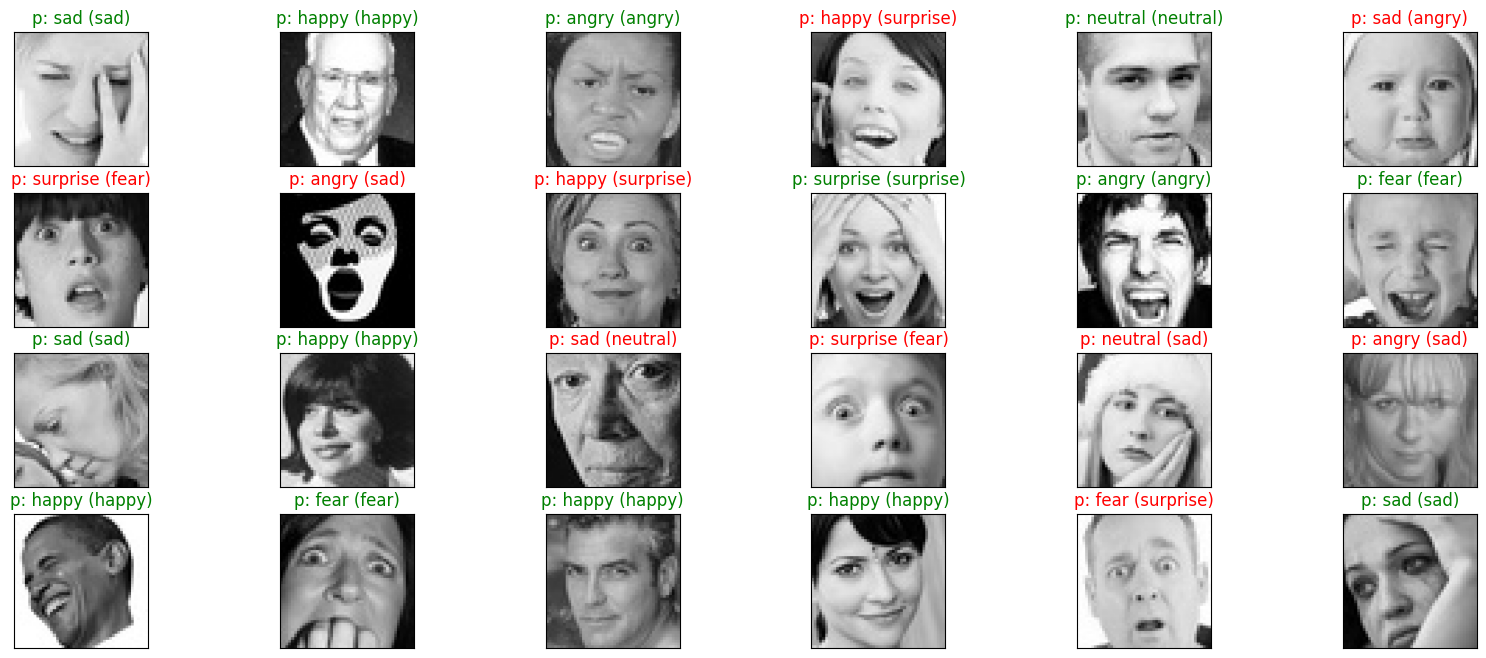

In [ ]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = classes[(np.argmax(predict[index]))]
    true_index = classes[(np.argmax(y_test[index]))]

    ax.set_title("p: {} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 16s/step


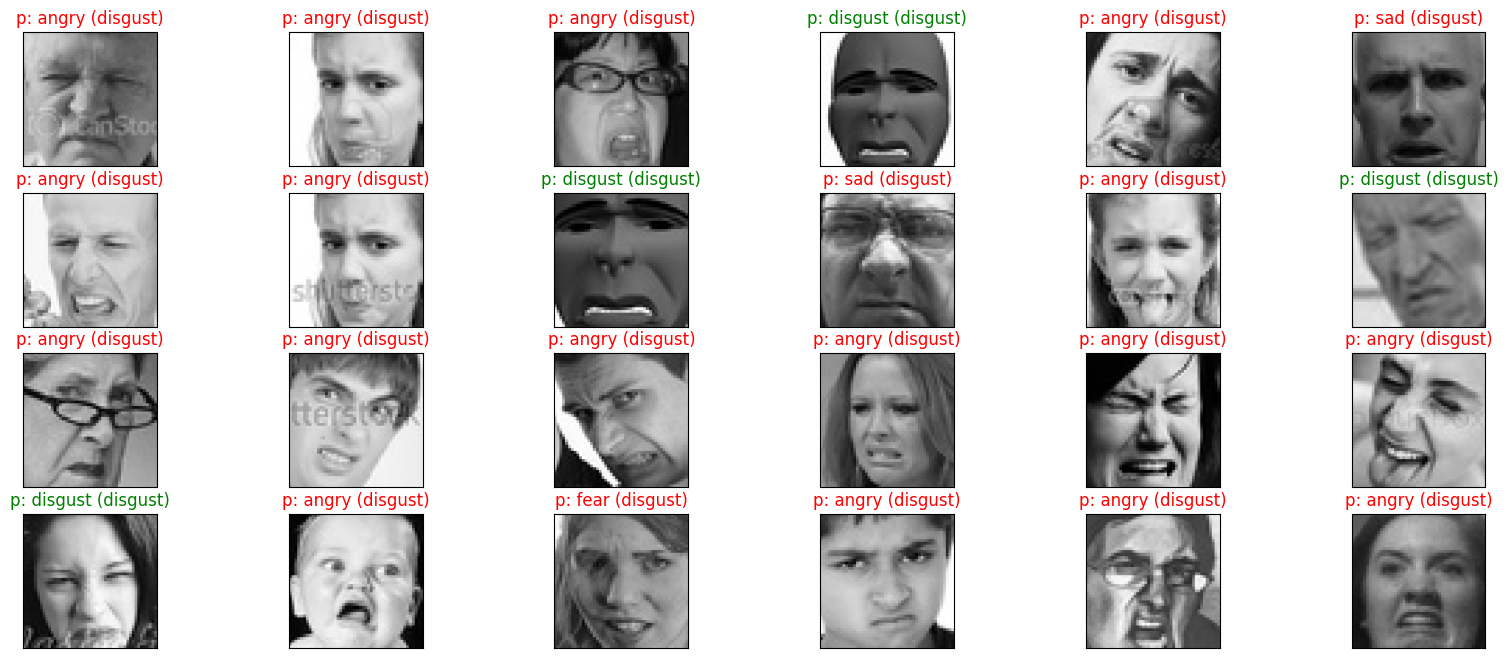

In [ ]:
x_test,y_test = next(disgust_generator)
predict = main.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = classes[(np.argmax(predict[index]))]
    true_index = classes[(np.argmax(y_test[index]))]

    ax.set_title("p: {} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [12]:
fine2_4 = models.load_model('./model_new2_4.keras')


4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 16s/step


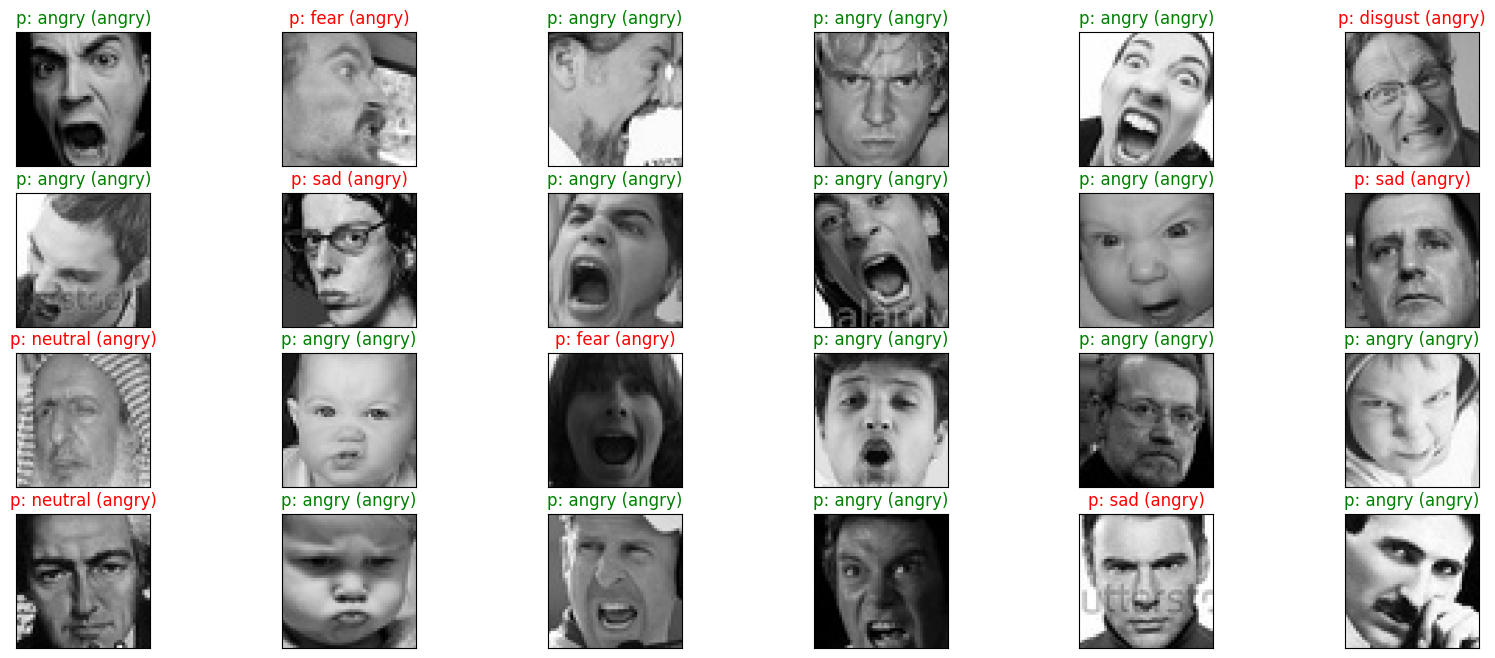

In [13]:
x_test,y_test = next(test_generator)
predict = fine2_4.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = classes[(np.argmax(predict[index]))]
    true_index = classes[(np.argmax(y_test[index]))]

    ax.set_title("p: {} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


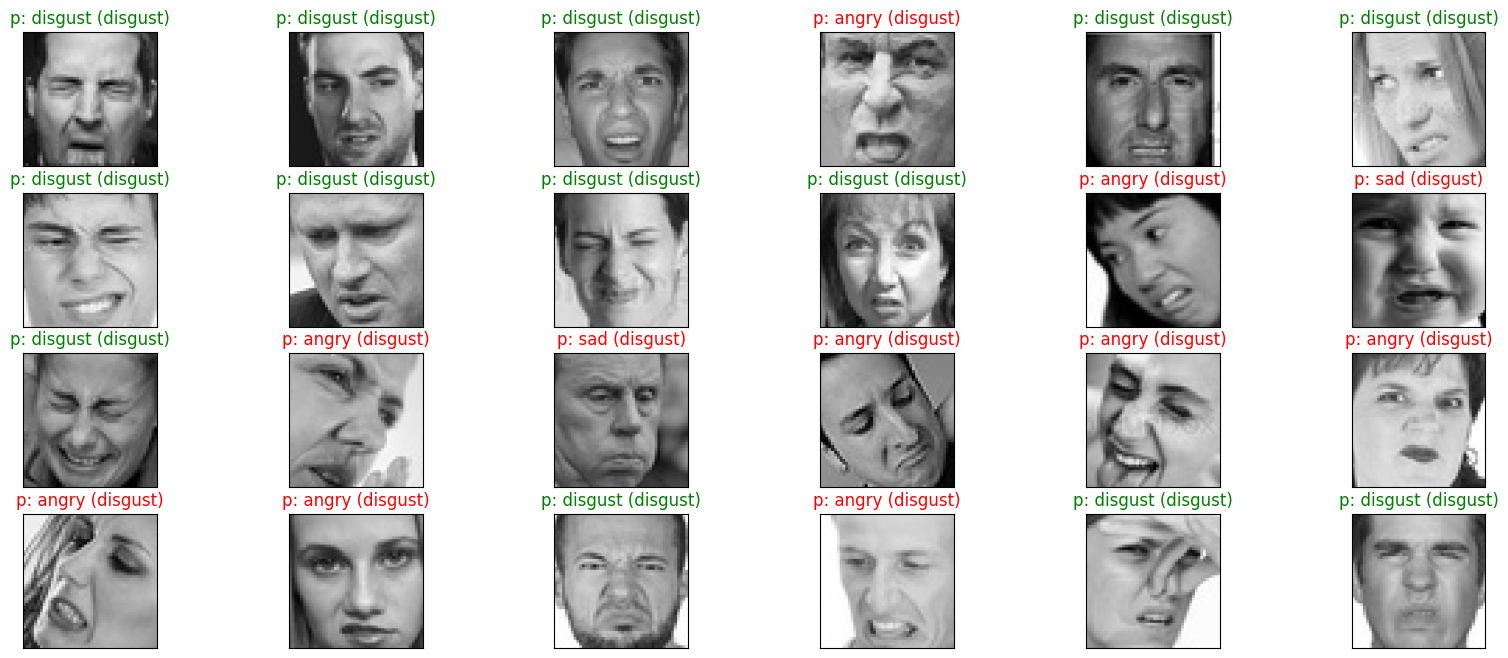

In [ ]:
x_test,y_test = next(disgust_generator)
predict = fine2_4.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = classes[(np.argmax(predict[index]))]
    true_index = classes[(np.argmax(y_test[index]))]

    ax.set_title("p: {} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [ ]:
# prompt: Wanna learn img's color channel

import cv2

# Load the image
image_path = "./images.jpeg"
img = cv2.imread(image_path)

img.shape

(183, 275, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.1,4)
for x, y, w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (20, 255,57),2)
    facess = face_cascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

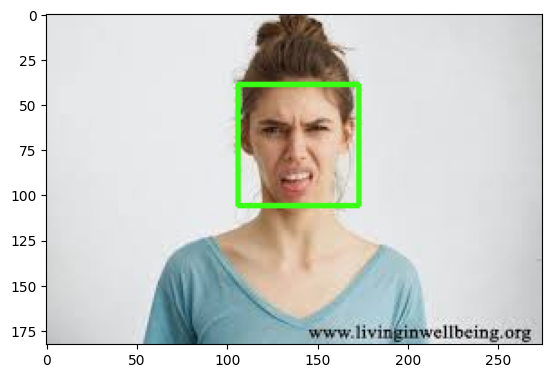

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

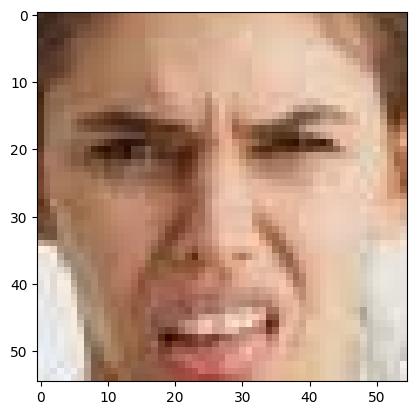

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:

final_image = cv2.resize(face_roi, (197,197))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [ ]:
def predict_emotion(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1,4)
    for x, y, w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (20, 255,57),2)
        facess = face_cascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image = cv2.resize(face_roi, (197,197))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    n = np.argmax(m.predict(final_image))
    return [key for key,value in dic.items()][n]

In [ ]:
import cv2


cap = cv2.VideoCapture(2)


if not cap.isOpened():
    print("Error: Could not open the camera.")
    exit()

while True:
    
    ret, frame = cap.read()

  
    if not ret:
        print("Error: Cannot receive frame (stream end?). Exiting...")
        break

    cv2.imshow('Camera Feed', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


Error: Could not open the camera.
Error: Cannot receive frame (stream end?). Exiting...


In [ ]:

path = "./haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


rectangle_bgr = (255, 255, 255)

img = np.zeros((500, 500))

text = "Some text in a box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2. CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x, y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image =cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image=final_image/255.0

    font = cv2. FONT_HERSHEY_SIMPLEX

    Predictions = fine2_4.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions) == 0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75
    
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
      
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions) == 1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
      
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions) == 2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions) == 3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions) == 4):
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions) == 5):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    else:
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255), 2)

        cv2.putText(frame,status,(100, 150),font, 3,(0,0,255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))


    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [3]:
model = main_model

fine_tuned = fine2_4


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize


y_pred = main.predict(test_generator)
y_true = test_generator.classes

classes = [0, 1, 2,3,4,5,6]
y_true_bin = label_binarize(y_true, classes=classes)

auc_score = roc_auc_score(y_true_bin, y_pred, multi_class='ovr')
print("AUC-ROC Score (Macro-Average):", auc_score)

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 429ms/step
AUC-ROC Score (Macro-Average): 0.9098608376959676


In [ ]:
y_pred = fine2_4.predict(test_generator)
y_true = test_generator.classes

classes = [0, 1, 2,3,4,5,6]
y_true_bin = label_binarize(y_true, classes=classes)

auc_score = roc_auc_score(y_true_bin, y_pred, multi_class='ovr')
print("AUC-ROC Score (Macro-Average):", auc_score)

57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 428ms/step
AUC-ROC Score (Macro-Average): 0.9096580695259858


Confusion Matrix
[[ 556    4   87   32  101  157   21]
 [  69   10   14    5    3   10    0]
 [ 149    2  368   32  111  273   89]
 [  40    0   32 1573   76   26   27]
 [  48    1   47   88  808  216   25]
 [ 102    0   97   70  225  733   20]
 [  18    0  121   39   15   11  627]]
Classification Report
              precision    recall  f1-score   support

       angry       0.57      0.58      0.57       958
     disgust       0.59      0.09      0.16       111
        fear       0.48      0.36      0.41      1024
       happy       0.86      0.89      0.87      1774
     neutral       0.60      0.66      0.63      1233
         sad       0.51      0.59      0.55      1247
    surprise       0.78      0.75      0.76       831

    accuracy                           0.65      7178
   macro avg       0.63      0.56      0.56      7178
weighted avg       0.65      0.65      0.64      7178



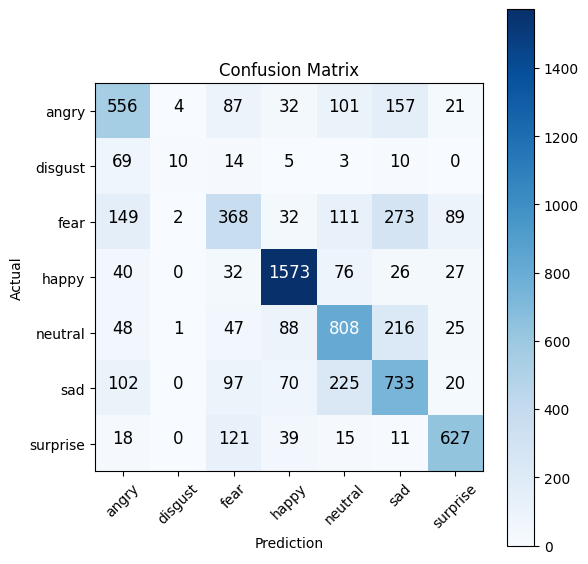

In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = dic
class_labels = {v: k for k, v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix


cm_train = confusion_matrix(test_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(6, 6))
plt.imshow(cm_train, interpolation='nearest', cmap='Blues')  
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')

threshold = cm_train.max() / 2  
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        color = "white" if cm_train[i, j] > threshold else "black"
        plt.text(j, i, f"{cm_train[i, j]}", horizontalalignment="center", color=color, fontsize=12)

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step
Confusion Matrix
[[  0   0   0   0   0   0   0]
 [280  48  54   4   3  44   3]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
     disgust       1.00      0.11      0.20       436
        fear       0.00      0.00      0.00         0
       happy       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
         sad       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         0

    accuracy                           0.11       436
   macro avg       0.14      0.02      0.03       436
weighted avg       1.00      0.11      0.20       436



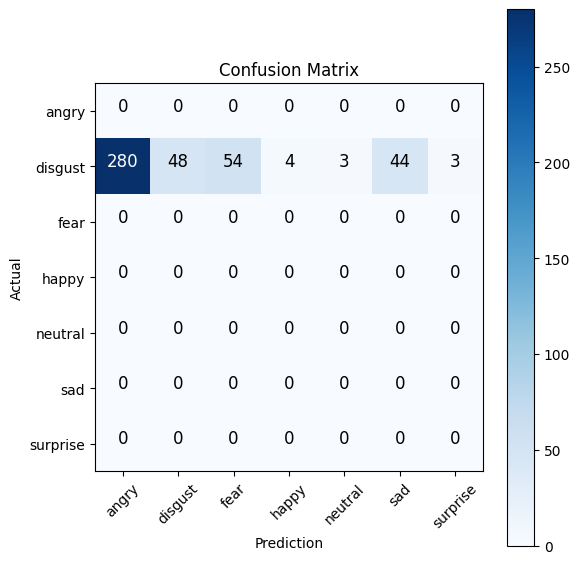

In [ ]:
y_pred = model.predict(disgust_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = dic
class_labels = {v: k for k, v in class_labels.items()}

cm_train = confusion_matrix(disgust_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(disgust_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(6, 6))
plt.imshow(cm_train, interpolation='nearest', cmap='Blues')  
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')

threshold = cm_train.max() / 2  #
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        color = "white" if cm_train[i, j] > threshold else "black"
        plt.text(j, i, f"{cm_train[i, j]}", horizontalalignment="center", color=color, fontsize=12)

plt.tight_layout()
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 405ms/step
Confusion Matrix
[[ 557   33   96   21   80  154   17]
 [  39   45   12    4    2    9    0]
 [ 141   18  387   28   89  277   84]
 [  49    0   42 1555   70   31   27]
 [  59    2   52   89  751  253   27]
 [ 114    4  105   67  187  751   19]
 [  19    0  135   38   11    9  619]]
Classification Report
              precision    recall  f1-score   support

       angry       0.57      0.58      0.58       958
     disgust       0.44      0.41      0.42       111
        fear       0.47      0.38      0.42      1024
       happy       0.86      0.88      0.87      1774
     neutral       0.63      0.61      0.62      1233
         sad       0.51      0.60      0.55      1247
    surprise       0.78      0.74      0.76       831

    accuracy                           0.65      7178
   macro avg       0.61      0.60      0.60      7178
weighted avg       0.65      0.65      0.65      7178



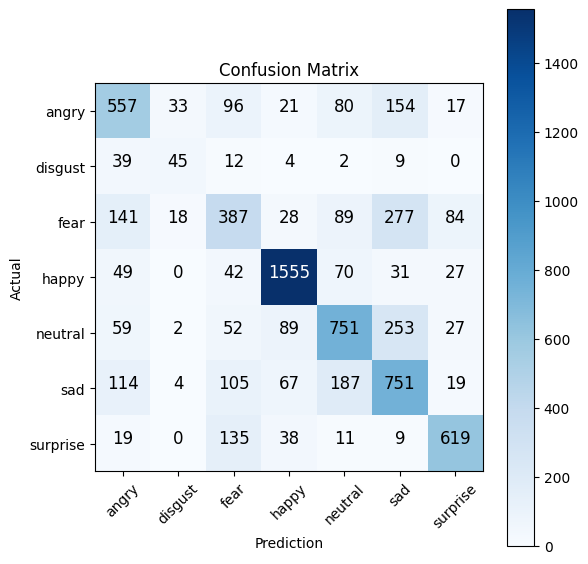

In [ ]:
y_pred = fine2_4.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = dic
class_labels = {v: k for k, v in class_labels.items()}


cm_train = confusion_matrix(test_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(6, 6))
plt.imshow(cm_train, interpolation='nearest', cmap='Blues')  
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')

threshold = cm_train.max() / 2  
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        color = "white" if cm_train[i, j] > threshold else "black"
        plt.text(j, i, f"{cm_train[i, j]}", horizontalalignment="center", color=color, fontsize=12)

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step
Confusion Matrix
[[  0   0   0   0   0   0   0]
 [153 198  43   4   2  35   1]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
     disgust       1.00      0.45      0.62       436
        fear       0.00      0.00      0.00         0
       happy       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
         sad       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         0

    accuracy                           0.45       436
   macro avg       0.14      0.06      0.09       436
weighted avg       1.00      0.45      0.62       436



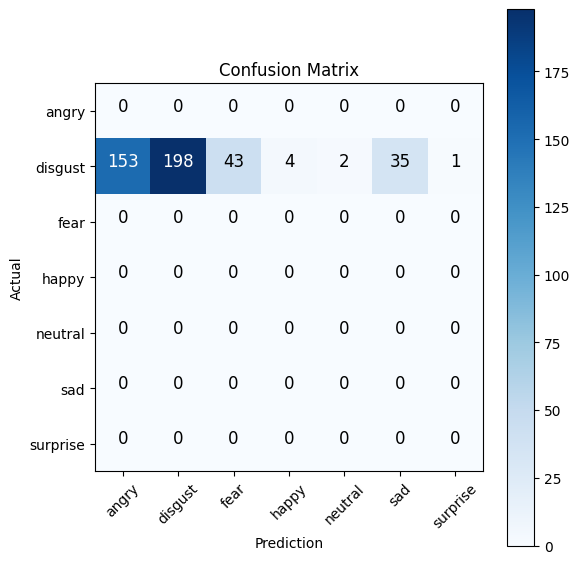

In [ ]:
y_pred = fine2_4.predict(disgust_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = dic
class_labels = {v: k for k, v in class_labels.items()}


cm_train = confusion_matrix(disgust_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(disgust_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(6, 6))
plt.imshow(cm_train, interpolation='nearest', cmap='Blues')  
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')

threshold = cm_train.max() / 2
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        color = "white" if cm_train[i, j] > threshold else "black"
        plt.text(j, i, f"{cm_train[i, j]}", horizontalalignment="center", color=color, fontsize=12)

plt.tight_layout()
plt.show()

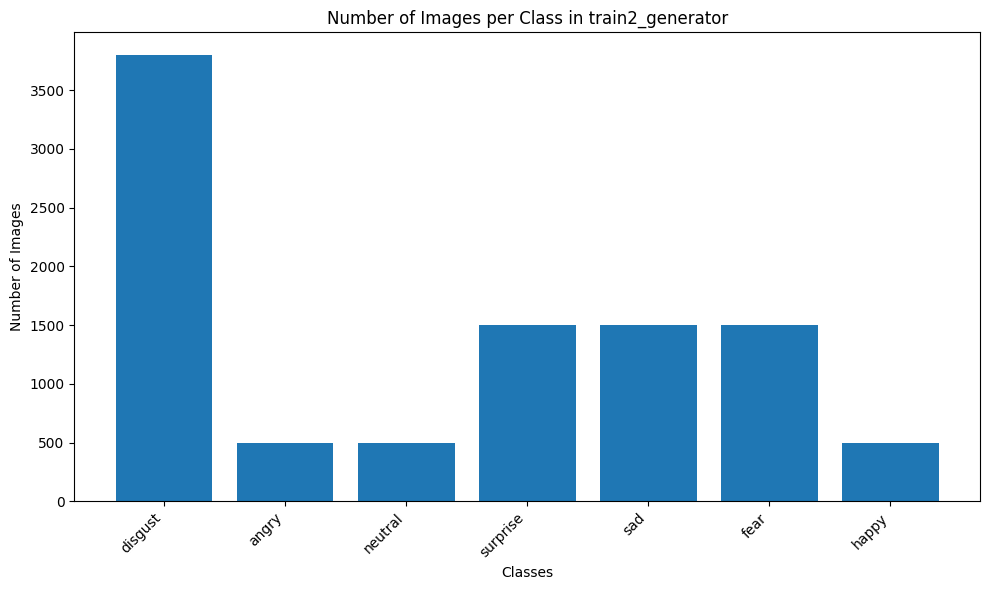

In [ ]:
class_labels = train2_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

class_counts = {}
for i in range(len(train2_generator)):
    _, labels = train2_generator[i]  
    for label in labels:
        class_index = np.argmax(label)
        class_name = [key for key, values in dic.items()][class_index]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in train2_generator")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [ ]:
[key for key, values in dic.items()]

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step
Class angry: Sensitivity = 0.58
Class disgust: Sensitivity = 0.09
Class fear: Sensitivity = 0.36
Class happy: Sensitivity = 0.89
Class neutral: Sensitivity = 0.66
Class sad: Sensitivity = 0.59
Class surprise: Sensitivity = 0.75


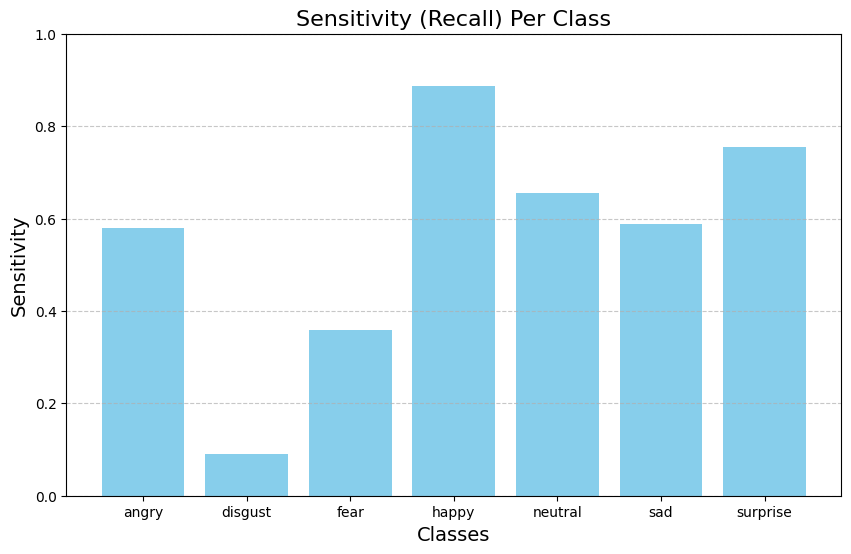

In [ ]:
x_test = []
y_test = []

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    x_test.append(x_batch)
    y_test.append(y_batch)

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 


cm = confusion_matrix(y_true_classes, y_pred_classes)

sensitivity = cm.diagonal() / cm.sum(axis=1)

class_labels = list(dic.keys())
for i, class_name in enumerate(class_labels):
    print(f"Class {class_name}: Sensitivity = {sensitivity[i]:.2f}")


plt.figure(figsize=(10, 6))
plt.bar(class_labels, sensitivity, color='skyblue')
plt.title("Sensitivity (Recall) Per Class", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Sensitivity", fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step
Class angry: Sensitivity = 0.58
Class disgust: Sensitivity = 0.41
Class fear: Sensitivity = 0.38
Class happy: Sensitivity = 0.88
Class neutral: Sensitivity = 0.61
Class sad: Sensitivity = 0.60
Class surprise: Sensitivity = 0.74


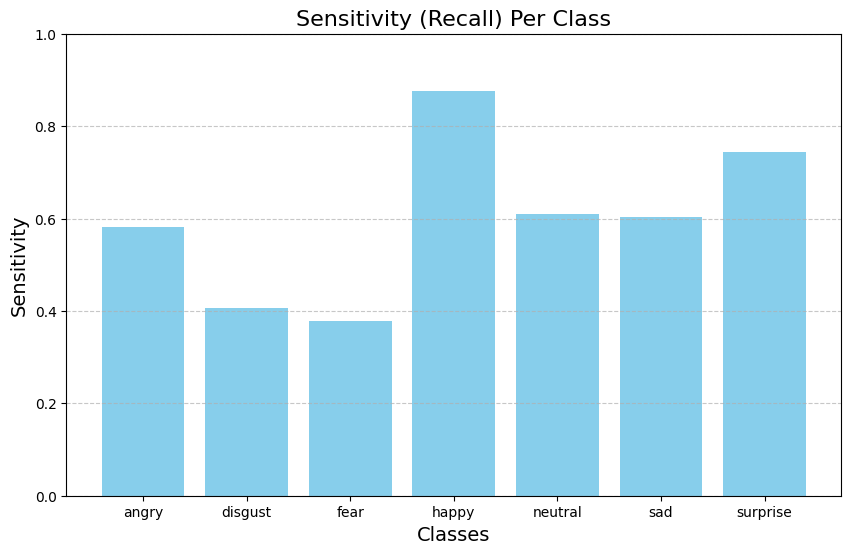

In [ ]:
x_test = []
y_test = []

for i in range(len(test_generator)): 
    x_batch, y_batch = test_generator[i]
    x_test.append(x_batch)
    y_test.append(y_batch)


x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

y_pred = fine_tuned.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1)  

cm = confusion_matrix(y_true_classes, y_pred_classes)


sensitivity = cm.diagonal() / cm.sum(axis=1)

class_labels = list(dic.keys())
for i, class_name in enumerate(class_labels):
    print(f"Class {class_name}: Sensitivity = {sensitivity[i]:.2f}")


plt.figure(figsize=(10, 6))
plt.bar(class_labels, sensitivity, color='skyblue')
plt.title("Sensitivity (Recall) Per Class", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Sensitivity", fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
